# Machine Learning Classification Project 
### The dataset we have is for California and its sub-cities
### And we are going to use NaiveBayes, LogisticRegression and  KNN algorithms to predict who is eligible for lending

In [1]:
import numpy as np                      # call the libaris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import zipcodes
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
Data = pd.read_csv ('G:/Bank_Personal_Loan_Modelling.csv')  #create the dataframe
df = pd.DataFrame (Data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


# Introducing features :

##### ID : Customerid
##### Age : Customer's age in completed years
##### Experience : Years of professional experience
##### Income : Annual income if the customer
##### ZIP Code : Hohe address ZIP code
##### Family : Family size of the customers
##### CCAvg : Average spending on credit cart per mouth
##### Education : Level of Education
    Udergran = 1
    Gradute = 2
    Advance = 3
##### Mortgage : Value of house mortgage if any
##### Personal Loan : Did this customer accept the personal loan offered in the last compaign?
##### Securities Account : does the customer have a securities account with the bank?
##### CD Account : does the customer have a cetificate of deposit with the bank?
##### Online : does the customer use internet banking facilites?
##### CreditCard : does the customer use a credit cart issued by universalbank?

In [3]:
df.describe ()          # we know the dataset with describe

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.info()                   #cognition the type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
df['Experience'] = abs(df['Experience'])       # We make Experience column positive
df['Experience'].nsmallest(3)

105    0
151    0
155    0
Name: Experience, dtype: int64

In [6]:
df['CCAvg'] = df['CCAvg'].str.replace ('/' , '.')     # replace values of ccavg columns
df['CCAvg'].head(3)

0    1.60
1    1.50
2    1.00
Name: CCAvg, dtype: object

In [7]:
df['CCAvg'] = df['CCAvg'].astype(float)         # convert numbers to decimals
df['CCAvg'].dtypes

dtype('float64')

In [8]:
df['ZIP Code'].nsmallest(3)

384      9307
652     90005
1469    90005
Name: ZIP Code, dtype: int64

In [9]:
df['CCAvg'] = df['CCAvg']*12
df['CCAvg'].head(3)

0    19.2
1    18.0
2    12.0
Name: CCAvg, dtype: float64

In [10]:
df.drop (labels='ID', axis=1, inplace=True) 

### check missing values

In [11]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
df['ZIP Code'].nunique()

467

In [13]:
df.reset_index (drop=True)        # reset index of detaset
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


### Categorical

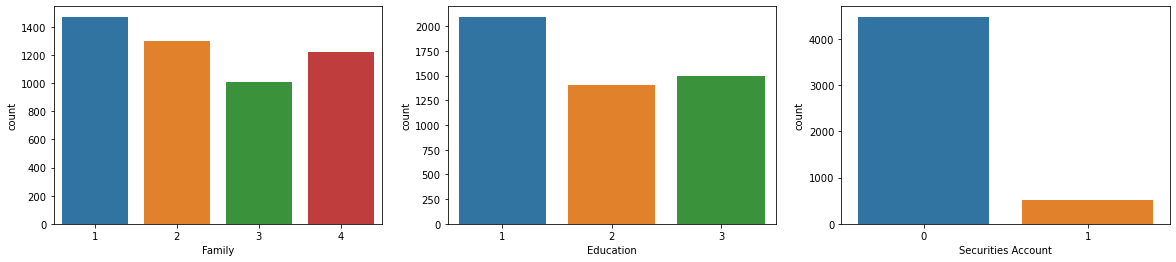

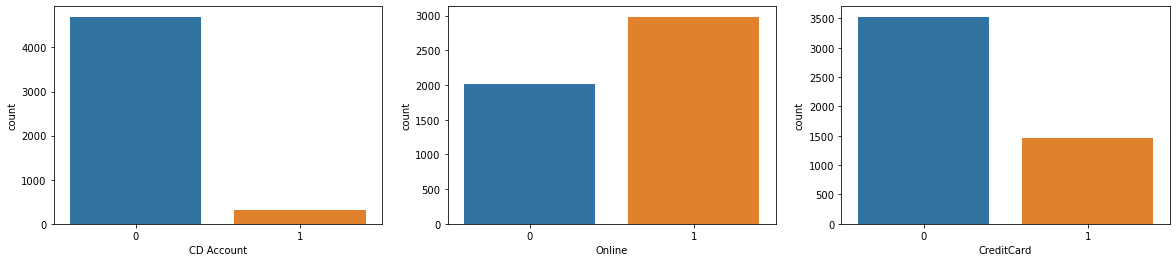

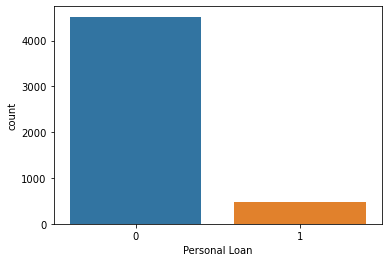

In [14]:
categorical = ['Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']
i = 0
while i < 8 :
    fig = plt.figure (figsize=(20,4))
    plt.subplot (1,3,1)
    sns.countplot (x=categorical[i], data=df)
    i += 1
    if i == 7 :
        break
    plt.subplot (1,3,2)
    sns.countplot (x=categorical[i], data=df)
    i += 1
    plt.subplot (1,3,3)
    sns.countplot (x=categorical[i], data=df)
    i += 1
    plt.show()

### Numerical

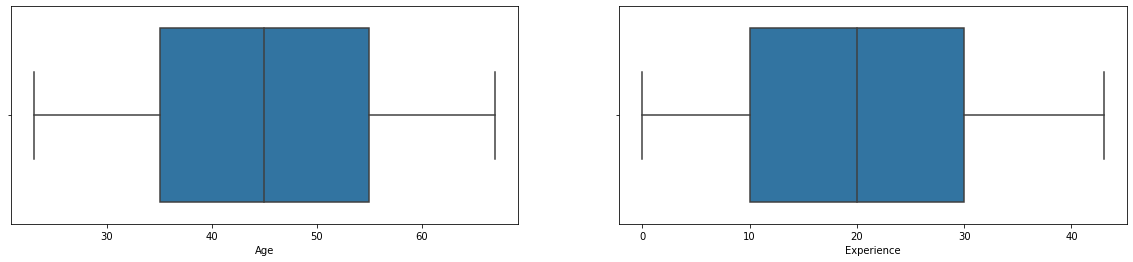

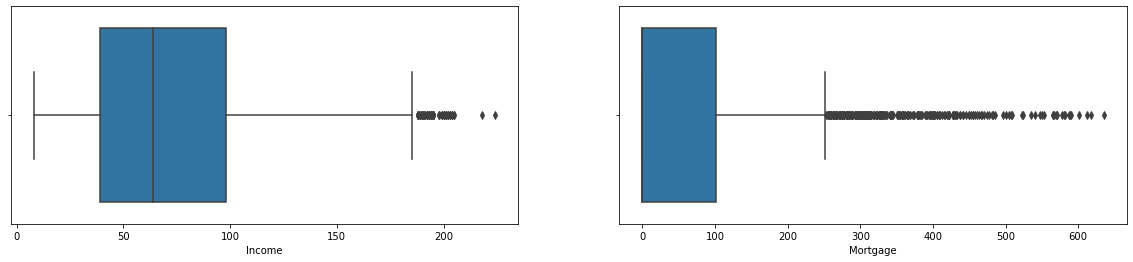

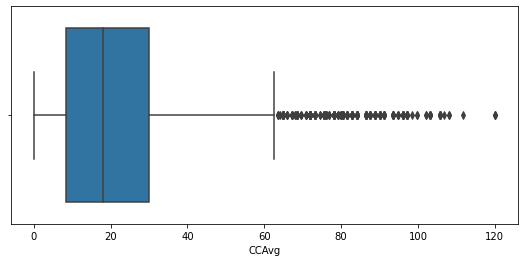

In [15]:
numerical = ['Age','Experience','Income','Mortgage','CCAvg']
i = 0
while i < 6 :
    fig = plt.figure (figsize=(20,4))
    plt.subplot (1,2,1)
    sns.boxplot (x=numerical[i], data=df)
    i += 1
    if i == 5 :
        break
    plt.subplot (1,2,2)
    sns.boxplot (x=numerical[i], data=df)
    i += 1
    plt.show()

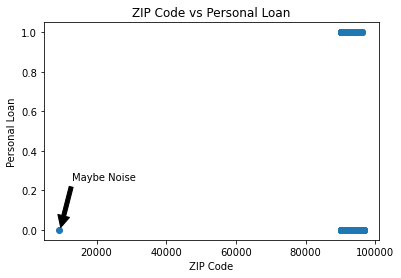

In [16]:
plt.scatter (df['ZIP Code'],df['Personal Loan'])
plt.title ('ZIP Code vs Personal Loan')
plt.xlabel ('ZIP Code')
plt.ylabel ('Personal Loan')         # As revenue increases, the tendency to use the card increase
plt.annotate ('Maybe Noise', xy=(9500,0), xytext=(13000,0.25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
# annotate >>> Suitable for margins

In [17]:
df[df['ZIP Code']<20000]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,7.2,3,0,0,0,0,1,1


In [18]:
df.drop (index=384, inplace=True)

In [19]:
country = []
Lat = []
Long = []
for x in list(df['ZIP Code']) :
    city_country = zipcodes.matching(str(x))
    if len(city_country) == 1 :
        county = city_country[0].get('county')
        lat = city_country[0].get('lat')
        long = city_country[0].get('long')
    else :
        county = 'NotFound'
        lat = np.NaN
        long = np.NaN
    country.insert (0, county)
    Lat.insert (0, lat)
    Long.insert (0, long)
country.reverse()
Lat.reverse()
Long.reverse()
df['Place'] = country
df['Latitude'] = Lat
df['Longitude'] = Long

In [20]:
print (zipcodes.matching(str(91107)))

[{'zip_code': '91107', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Pasadena', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Los Angeles County', 'timezone': 'America/Los_Angeles', 'area_codes': ['626'], 'world_region': 'NA', 'country': 'US', 'lat': '34.1620', 'long': '-118.0894'}]


In [21]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273


In [22]:
df = df.astype ({'Latitude':float, 'Longitude':float})

In [23]:
df.isna().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Place                  0
Latitude              33
Longitude             33
dtype: int64

## There are 33 missing values in Latitude and Longitude

In [24]:
df[df['Place']=='NotFound']['ZIP Code'].value_counts()

92717    22
96651     6
92634     5
Name: ZIP Code, dtype: int64

In [25]:
def highlight_cols (s) :
    color = 'yellow'
    return 'background-color : %s' % color

### ZIP: 92717

Place Name: Irvine

State: California

Latitude: 33.646200000000

Longitude: -117.839800000000

In [26]:
Z_92717 = list(df[df['ZIP Code']==92717].index)
for i in Z_92717 :
    df['Place'].loc[i] = 'Irvine'
    df['Latitude'].loc[i] = 33.6462
    df['Longitude'].loc[i] = -117.8398
df[df['ZIP Code']==92717].style.applymap (highlight_cols, subset=pd.IndexSlice[:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
106,43,17,69,92717,4,34.800000,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,93.600000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,18.000000,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,52.800000,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,3.600000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,9.600000,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,22.800000,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,16.800000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,8.400000,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,4.800000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


### ZIP : 96651

Place Name: Rudno nad Hronom

State: Slovakia

Latitude: 48.4242

Longitude: 18.7071

In [27]:
Z_96651 = list(df[df['ZIP Code']==96651].index)
for i in Z_96651 :
    df['Place'].loc[i] = 'Rudno nad Hronom'
    df['Latitude'].loc[i] = 48.4242
    df['Longitude'].loc[i] = 18.7071
df[df['ZIP Code']==96651].style.applymap (highlight_cols, subset=pd.IndexSlice[:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
630,32,7,35,96651,3,15.600000,1,108,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
672,51,27,23,96651,1,2.400000,1,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1426,37,11,60,96651,3,6.000000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1653,26,1,24,96651,2,10.800000,3,123,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
2731,29,5,28,96651,1,2.400000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
3525,59,34,13,96651,4,10.800000,2,0,0,0,0,0,0,Rudno nad Hronom,48.424200,18.707100


### ZIP: 92634

Place Name: Fullerton

State: California

Latitude: 33.873900000000

Longitude: -117.902800000000

In [28]:
Z_92634 = list(df[df['ZIP Code']==92634].index)
for i in Z_92634 :
    df['Place'].loc[i] = 'Fullerton'
    df['Latitude'].loc[i] = 33.8739
    df['Longitude'].loc[i] = -117.9028
df[df['ZIP Code']==92634].style.applymap (highlight_cols, subset=pd.IndexSlice[:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
468,34,10,21,92634,1,6.000000,3,0,0,0,0,1,0,Fullerton,33.873900,-117.902800
780,32,7,42,92634,4,9.600000,1,0,0,0,0,1,1,Fullerton,33.873900,-117.902800
2218,38,13,9,92634,2,3.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800
3887,24,2,118,92634,2,86.400000,1,0,0,1,0,1,0,Fullerton,33.873900,-117.902800
4392,52,27,81,92634,4,45.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800


In [29]:
df_mapping = df[df['Place']!='Rudno nad Hronom']   # This place does not exist in America 

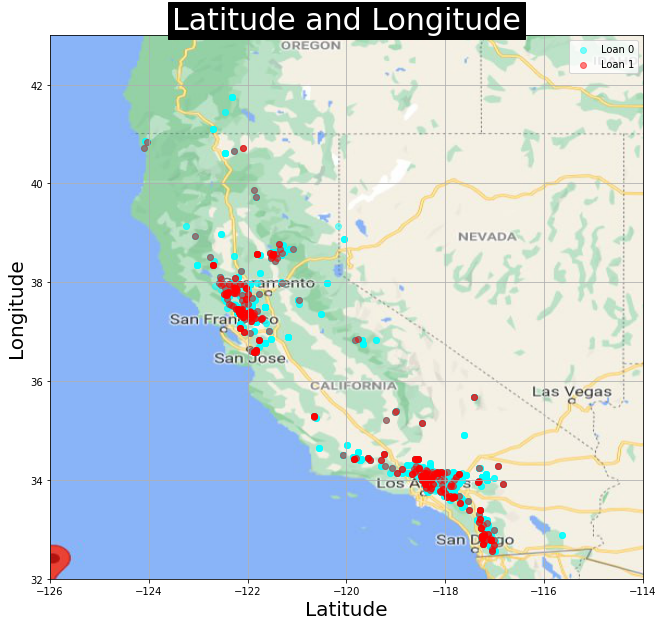

In [30]:
image = plt.imread ('G:/US_plan.jpg')    # get image as file
# separetion by Personal Loan :
target0 = df_mapping[df_mapping['Personal Loan']==0]
target1= df_mapping[df_mapping['Personal Loan']==1]
fig , ax = plt.subplots(figsize=(15,10))
# show image in background :
ax.imshow (image, extent=[-126, -114, 32, 43])
# scatter plot
ax.scatter(target0['Longitude'],target0['Latitude'], c='cyan', alpha=.5, label='Loan 0')
ax.scatter(target1['Longitude'],target1['Latitude'], c='r', alpha=.5, label='Loan 1')
plt.title('Latitude and Longitude', fontsize=30, backgroundcolor='black', c='white')
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.grid()
plt.legend(loc='best')
plt.show()

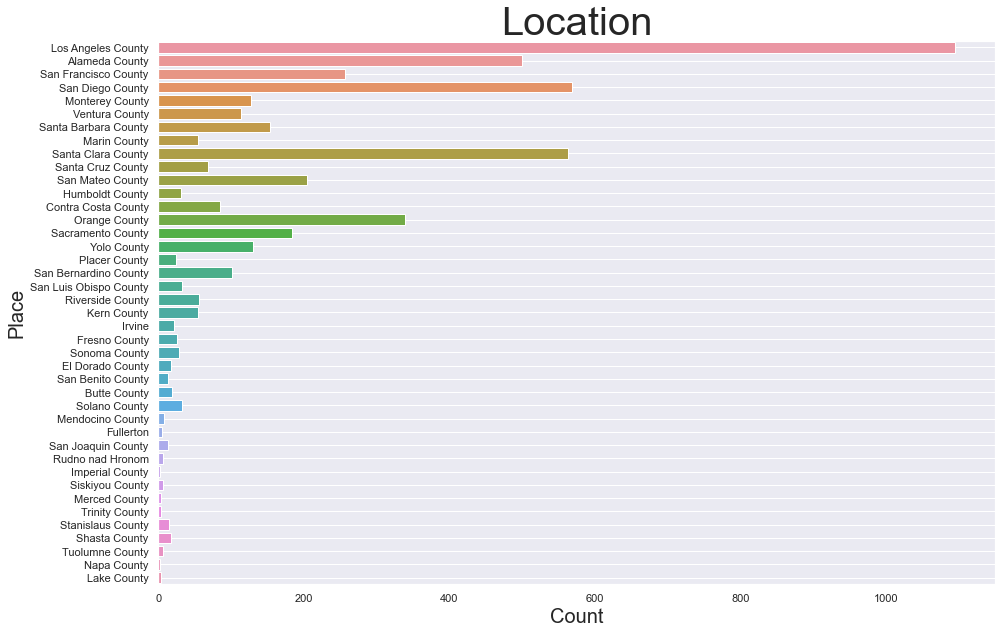

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(y="Place", data=df)
plt.title('Location', fontsize=40)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Place', fontsize=20)
plt.grid()
plt.show()

<AxesSubplot:ylabel='Density'>

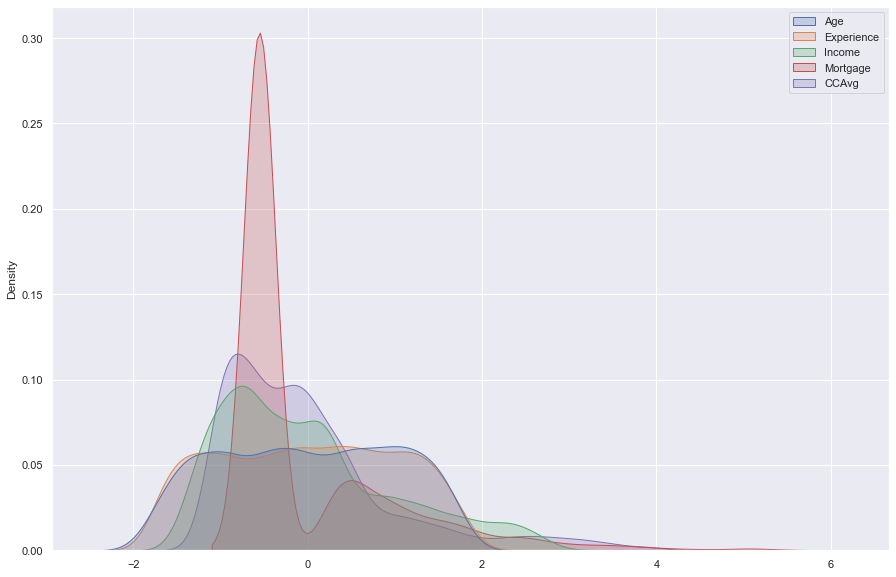

In [32]:
df_nom = pd.DataFrame(df, columns=['Age','Experience','Income','Mortgage','CCAvg'])
stdandard_ = StandardScaler ()
iris = pd.DataFrame (stdandard_.fit_transform (df_nom.values), columns=df_nom.columns)
sns.kdeplot(data=iris, shade=True)

In [33]:
fig , ax = plt.subplots (figsize = (18,12))
sns.heatmap (df.corr(), cmap='BuPu', cbar=True, annot=True, linewidths=0.5, linecolor='yellow')
plt.show()The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.


The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

SyntaxError: invalid syntax (<ipython-input-33-0904d861ccf3>, line 3)

In [ ]:
df_nom1= pd.DataFrame(df, columns=['Age','Experience','Income','Mortgage','CCAvg','Personal Loan'])

sns.pairplot(df_nom1, kind="scatter", hue='Personal Loan', corner=True)
plt.show()

In [ ]:
sns.pairplot(df_nom1, kind="kde", hue='Personal Loan', corner=True)
plt.show()

# LogisticRegression

In [34]:
x = df.drop(['Personal Loan','Place'], axis=1).values
y = df['Personal Loan'].values.reshape(-1,1)

In [35]:
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)   # split dataset to learn

In [36]:
log = LogisticRegression(solver='liblinear', class_weight='balanced')    # LogisticRegression between 0,1
log.fit(x_train,y_train.ravel())
y_pred = log.predict(x_test)
print('accuracy is : ',metrics.accuracy_score (y_test,y_pred))          # Accuracy == 90%
print('f1_score is : ',metrics.f1_score (y_test,y_pred))

accuracy is :  0.914
f1_score is :  0.6838235294117647


In [37]:
def Replace (dataframe) :
    dataframe = df.copy()
    df['Education'].replace([1,2,3],[4,5,6], inplace =True)
    df['Securities Account'].replace([1,2],[3,4], inplace =True)
    df['Online'].replace([1,2],[3,4], inplace =True)
    df['CD Account'].replace([1,2],[3,4], inplace =True)
    df['CreditCard'].replace([1,2],[3,4], inplace =True)
    return (dataframe)

In [38]:
def Logreg (x,y,testsize,solver) :
    df_testsize = pd.DataFrame ()
    for T in testsize :
        for S in solver :
            x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=T, random_state=0)
            logreg = LogisticRegression(solver=S, class_weight='balanced')
            logreg.fit(x_train,y_train.ravel())
            y_pred = logreg.predict(x_test)
            dict = {'Testsize': T, 'Solver': S, 'Accuracy': metrics.accuracy_score (y_test,y_pred), 'Score': logreg.score(x,y)}
            df_testsize = df_testsize.append(dict, ignore_index=True)
    return (x_train , x_test , y_train , y_test, y_pred, df_testsize)

def highlight_max (s) :
    is_max = s == s.max()
    return ['background-color : yellow' if v else '' for v in is_max]

In [39]:
x_train , x_test , y_train , y_test, y_pred, df_testsize = Logreg (x,y,
                        [0.15,0.2,0.25,0.3],
                        ['newton-cg','lbfgs','liblinear','sag','saga'])
df_testsize.style.apply (highlight_max)

,Accuracy,Score,Solver,Testsize
0,0.906667,0.897980,newton-cg,0.150000
1,0.862667,0.861572,lbfgs,0.150000
2,0.904000,0.897780,liblinear,0.150000
3,0.894667,0.903981,sag,0.150000
4,0.853333,0.861172,saga,0.150000
5,0.915000,0.896979,newton-cg,0.200000
6,0.873000,0.862172,lbfgs,0.200000
7,0.914000,0.895779,liblinear,0.200000
8,0.336000,0.323865,sag,0.200000
9,0.899000,0.903981,saga,0.200000


In [41]:
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)   # split dataset to learn
log = LogisticRegression(solver='newton-cg', class_weight='balanced')
log.fit(x_train,y_train.ravel())
y_pred = log.predict(x_test)
print('Accuracy is : ',metrics.accuracy_score (y_test,y_pred))   # Accuracy == 90%
print('Score is : ',log.score(x,y))
print('F1_score is : ',metrics.f1_score (y_test,y_pred))

Accuracy is :  0.915
Score is :  0.8969793958791759
F1_score is :  0.6840148698884758


# Accuracy is :  91%

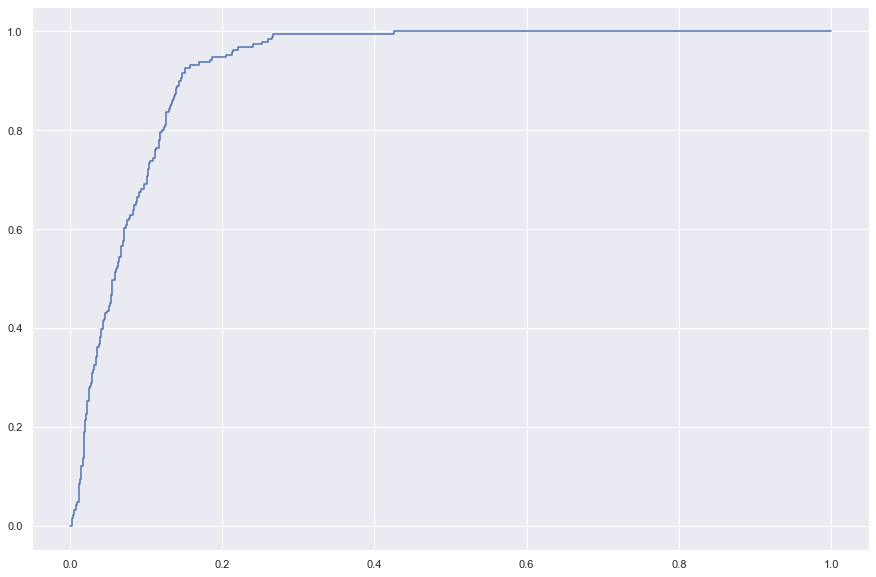

In [318]:
y_pred_proba = log.predict_proba (x_test)[::,1]        # Draw proba chart
fpr , tpr , _ = metrics.roc_curve (y_test,y_pred_proba)
plt.plot (x1,y1)

# Confusion Matrix

In [319]:
confusion_matrix (y_test,y_pred)

array([[1124,    2],
       [ 118,    6]], dtype=int64)

# GridSearch

In [44]:
log_new = LogisticRegression(solver='saga', class_weight='balanced', n_jobs=-1)
parameters = {'penalty':['l1','l2','elasticnet','none'], 'C':[0.1,0.2,0.5,1,2,5,10,20,50,100,200],
             'warm_start':[False,True], 'max_iter': [10,35,50,100,200,300]}
kfold = KFold (n_splits=10, shuffle=True, random_state=1)
gridsearch = GridSearchCV (log_new, param_grid=parameters, cv=kfold, scoring='f1', n_jobs=-1)

In [45]:
gridsearch.fit (x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200],
                         'max_iter': [10, 35, 50, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'warm_start': [False, True]},
             scoring='f1')

In [46]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'C': 100, 'max_iter': 300, 'penalty': 'l1', 'warm_start': True}
0.4054593934899994


In [49]:
log = LogisticRegression(C = 100, max_iter = 300, warm_start = True,
                          solver='newton-cg', class_weight='balanced')    # LogisticRegression between 0,1
log.fit(x_train,y_train.ravel())
y_pred = log.predict(x_test)
print('Accuracy is : ',metrics.accuracy_score (y_test,y_pred))

Accuracy is :  0.913


# Best Score For GridSearch is : 53%
### We have to test other algorithms :

# K Nearest Neighbor

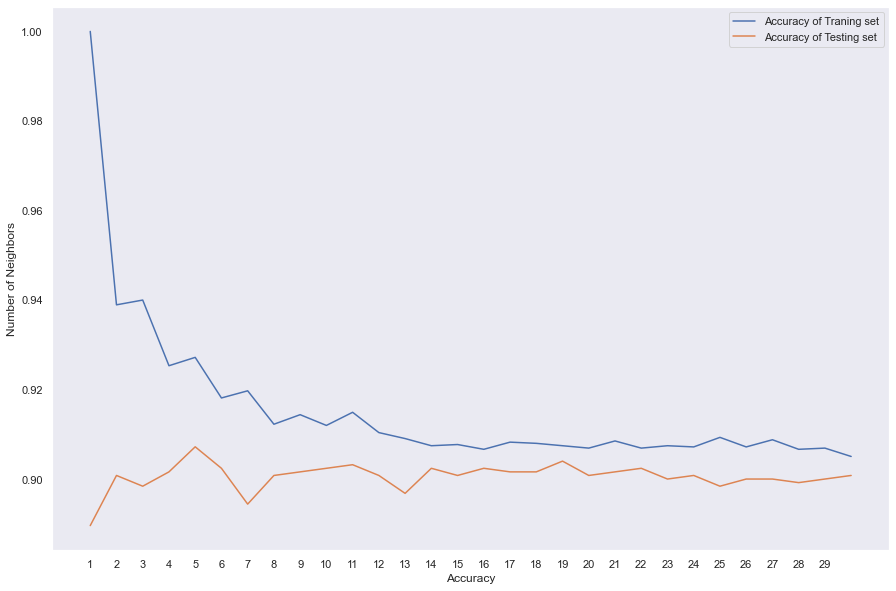

In [52]:
train_acc = []     # list of training
test_acc = []      # list of testing
number_k = range(1,31)      # 2 < k < 30
for K in number_k :
    x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.25, random_state=0)    # separate data to modeling
    knn = KNeighborsClassifier(K)       # define algorithm
    knn.fit(x_train,y_train.ravel())    # fit training dataset
    train_acc.append (knn.score(x_train,y_train))     # predict on testing data
    test_acc.append (knn.score(x_test,y_test))

plt.figure(figsize=(15,10))
plt.plot(number_k,train_acc, label='Accuracy of Traning set')
plt.plot(number_k,test_acc, label='Accuracy of Testing set')
plt.xlabel('Accuracy')
plt.ylabel('Number of Neighbors')
plt.xticks(range(1,30))
plt.grid()
plt.legend()

In [53]:
k = 5
clf = KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)
print (metrics.accuracy_score(y_test,y_pred))
print (np.max(test_acc))

0.9072
0.9072


In [54]:
confusion_matrix (y_test,y_pred)

array([[1104,   22],
       [  94,   30]], dtype=int64)

# NaiveBayes

In [57]:
x1 = pd.DataFrame (df, columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']).values
y1 = df['Personal Loan'].values.reshape(-1,1)
x_train , x_test , y_train , y_test = train_test_split (x1,y1, test_size=0.2, random_state=0)
nav = ComplementNB()
nav.fit(x_train,y_train.ravel())
y_pred = nav.predict(x_test)
metrics.accuracy_score (y_test,y_pred)

0.794

In [60]:
confusion_matrix(y_test, y_pred)  
# 4169 == TP  GOOD
# 276  == TN  GOOD
# 350  == FP  BADLY
# 204  == FN  Tragedy

array([[730, 169],
       [ 37,  64]], dtype=int64)